### **COVID-19 Interactive Analysis Dashboard**

### **What is COVID-19?**


Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

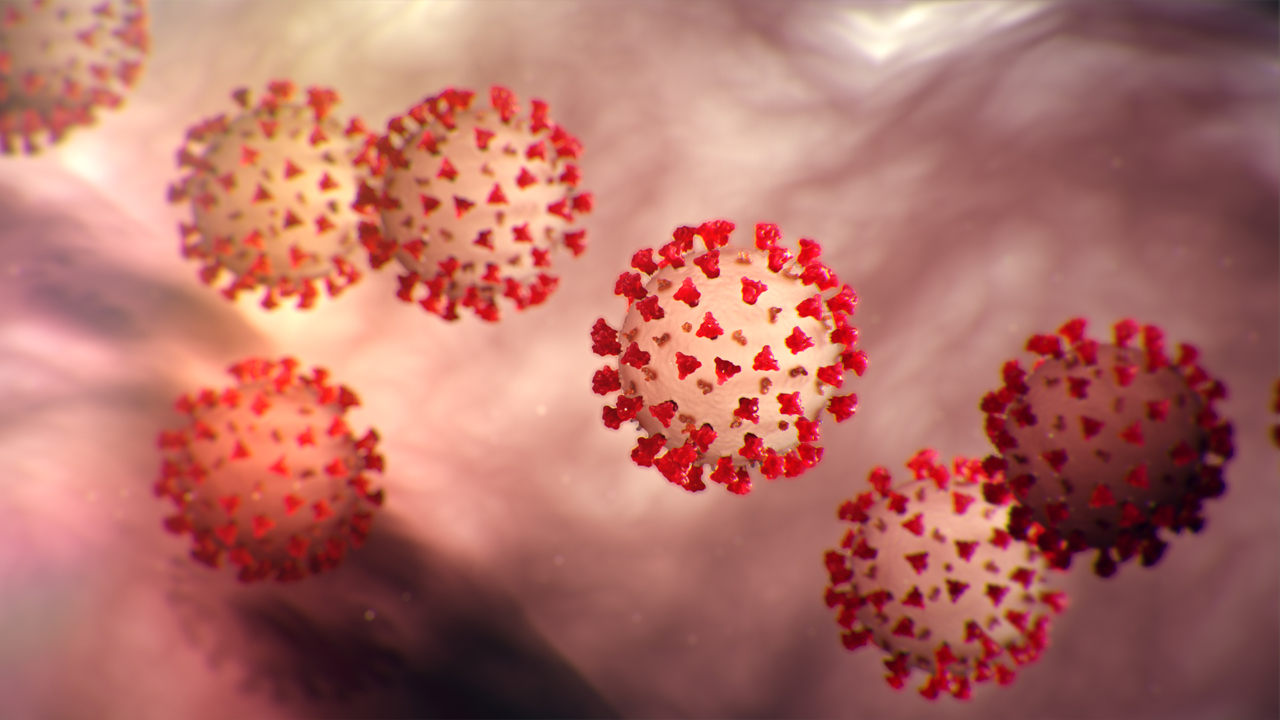

In [30]:
import pandas as pd
import numpy as np

In [31]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [32]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259


In [33]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,131,131,131,131,131,131,132,132,132,132
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735


In [35]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-12-07 03:22:46,33.93911,67.709953,157499,7316,NaN,NaN,404.586982,NaN,NaN,4.645109,4,AFG,1048,28
1,Albania,2021-12-07 03:22:46,41.15330,20.168300,201902,3115,NaN,NaN,7015.845437,NaN,NaN,1.542828,8,ALB,12605,155
2,Algeria,2021-12-07 03:22:46,28.03390,1.659600,211662,6111,NaN,NaN,482.684072,NaN,NaN,2.887150,12,DZA,4313,158
3,Andorra,2021-12-07 03:22:46,42.50630,1.521800,18631,133,NaN,NaN,24113.117194,NaN,NaN,0.713864,20,AND,2392,2
4,Angola,2021-12-07 03:22:46,-11.20270,17.873900,65259,1735,NaN,NaN,198.559204,NaN,NaN,2.658637,24,AGO,585,15


In [7]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

In [8]:
#confirmed_df.head()

In [9]:
#recovered_df.head()

In [10]:
#death_df.head()

In [11]:
#country_df.head()

In [12]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [13]:
from IPython.core.display import display, HTML

In [14]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed cases: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered cases: " + str(recovered_total) + "</span>"+
             "</div>")
       )

### COVID-19 Confirmed/Death/Recovered cases by countries
### Enter number of countries you want the data for:

In [15]:
import plotly.graph_objects as go

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [17]:
import ipywidgets as widgets

In [18]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: pink'
    y = 'background-color: lightyellow'
    g = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [19]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [20]:
import plotly.express as px

In [21]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [22]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

## Check the details of your country or the World
## Enter the name of your country(in capitalized format(e.g. Italy)) and world for total cases

In [23]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)


interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

### **10 worst hit countries - Death cases**

In [24]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [25]:
import matplotlib.pyplot as plt

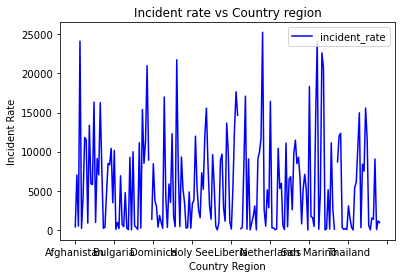

In [26]:
country_df.plot(x='country', y='incident_rate',color='blue')
plt.xlabel("Country Region")
plt.ylabel("Incident Rate")
plt.title("Incident rate vs Country region")
plt.show()

In [27]:
import plotly.express as px
fig = px.density_heatmap(country_df, x=country_df["country"], y=country_df["mortality_rate"], marginal_x="rug", marginal_y="histogram")
fig.show()

In [28]:
px.scatter(country_df.head(50), x=country_df['deaths_28_days'],y=country_df['country'], 
           hover_data=[country_df['country'],country_df['deaths_28_days'] ], 
           color=country_df['deaths_28_days'] , size=country_df['deaths_28_days'] , size_max=80)
#x axis: death rate 28 days
#y axis: Country name

In [29]:
px.bar(country_df, x=country_df["country"], y=country_df["deaths"], color=country_df["deaths"],height=400)

### **Summary:**

1.   What is COVID-19?
2.   Data loading from John Hopkins CSSE data repository
3.   Data Cleaning and Preparation
4.   Visualising N number of worst hit countries using plotly scatter plot
5.   Plotting confirmed cases as a bubble chart
6.   Plotting line chart
7.   Plotting bar chart
8.   Plotting line chart
9.   Plotting Density chart
10.  Plotting scatter plot
11.  Plotting bar plot

Symptoms:
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, difficulty in breathing(severe cases) and dry cough. Most people (about 80%) recover from the disease without needing special treatment.

### **References:**

More Info on COVID-19:


*   https://www.who.int/health-topics/coronavirus
*   https://www.who.int/emergencies/diseases/novel-coronavirus-2019
*   https://www.nature.com/articles/s41597-020-0448-0

**Refered youtube link:**

https://www.youtube.com/watch?v=FngV4VdYrkA

